In [121]:
# Standard modules
import os
import shutil
import glob

# Willow Fox Fortino's modules
import GPRutils
import vK2KGPR
import plotGPR

# Professor Gary Bernstein's modules
import getGaiaDR2 as gaia
import gbutil

# Science modules
import numpy as np
import astropy.units as u
import astropy.constants as c
import astropy.coordinates as co
import astropy.table as tb
import astropy.io.fits as fits
import astropy.stats as stats
from astropy.time import Time
from scipy.spatial.ckdtree import cKDTree

import matplotlib.pyplot as plt

from IPython import embed
from importlib import reload

In [123]:
fileDirs = sorted(glob.glob(f"../thesis/??????"))

[  6.8945583   46.48174296 220.53425467]
[ 2.55487105 12.69180852 49.16825584]
[ 1.72375422  7.72195128 24.94696652]
[ 1.9120975   8.90079948 31.79572525]


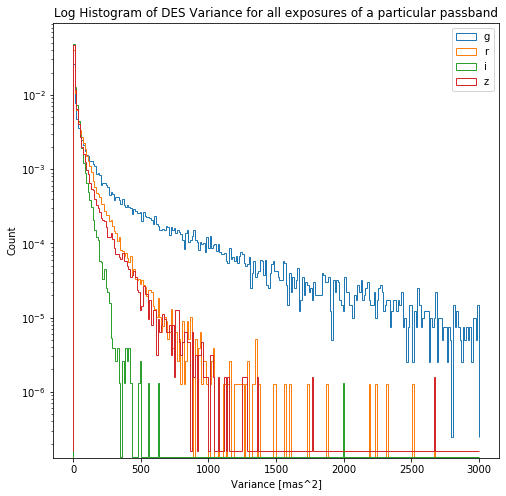

In [150]:
g = np.zeros([])
r = np.zeros([])
i = np.zeros([])
z = np.zeros([])
for fileDir in fileDirs:
    try:
        fitsFile = glob.glob(os.path.join(fileDir, "*fits"))[0]
        dataC = GPRutils.loadFITS(fitsFile)
        band = dataC.band
        err = dataC.TV[dataC.TV["Maskf"]]["DES variance"].value
    except Exception:
        continue

    if band == "g":
        g = np.append(g, err)
    if band == "r":
        r = np.append(r, err)
    if band == "i":
        i = np.append(i, err)
    if band == "z":
        z = np.append(z, err)
        
plt.figure(figsize=(8, 8))
plt.hist(g, bins=250, histtype="step", range=(0, 3000), label="g", log=True, density=True)
plt.hist(r, bins=250, histtype="step", range=(0, 3000), label="r", log=True, density=True)
plt.hist(i, bins=250, histtype="step", range=(0, 3000), label="i", log=True, density=True)
plt.hist(z, bins=250, histtype="step", range=(0, 3000), label="z", log=True, density=True)
plt.legend()

print(np.percentile(g, (25, 50, 75)))
print(np.percentile(r, (25, 50, 75)))
print(np.percentile(i, (25, 50, 75)))
print(np.percentile(z, (25, 50, 75)))

# plt.xlim((0, 100))
plt.title("Log Histogram of DES Variance for all exposures of a particular passband")
plt.xlabel("Variance [mas^2]")
plt.ylabel("Count")
plt.show()

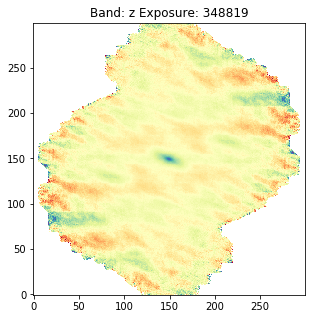

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 86.598 ± 1.751 mas^2
xif: 9.641 ± 0.613 mas^2
Reduction: 8.983


Jackknifed xi+ (Inter-set pairs excluded)
xi0: 103.152 ± 2.335 mas^2
xif: 9.547 ± 1.217 mas^2
Reduction: 10.805


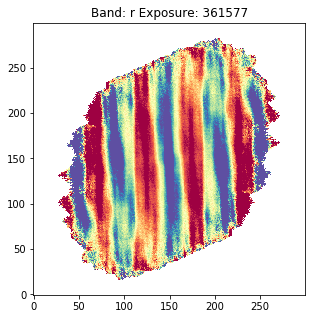

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 258.237 ± 4.899 mas^2
xif: 20.404 ± 1.479 mas^2
Reduction: 12.656


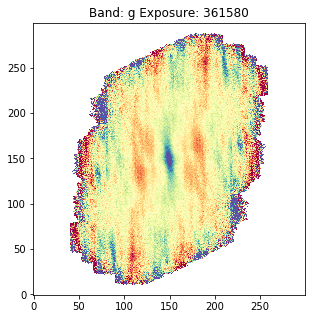

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 138.661 ± 6.606 mas^2
xif: 31.695 ± 5.847 mas^2
Reduction: 4.375


Jackknifed xi+ (Inter-set pairs excluded)
xi0: 107.08 ± 2.021 mas^2
xif: 10.18 ± 0.665 mas^2
Reduction: 10.519


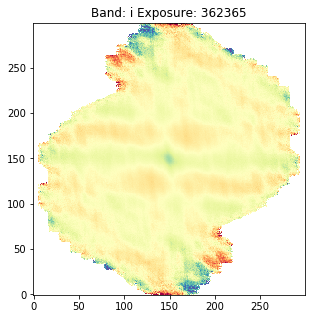

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 41.879 ± 0.892 mas^2
xif: 4.643 ± 0.404 mas^2
Reduction: 9.02


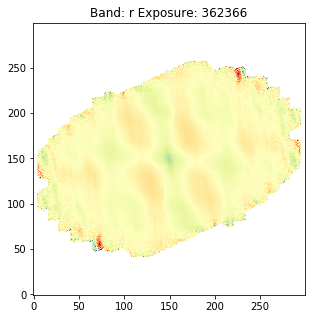

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 36.299 ± 0.771 mas^2
xif: 5.201 ± 0.419 mas^2
Reduction: 6.98


Jackknifed xi+ (Inter-set pairs excluded)
xi0: 79.65 ± 1.616 mas^2
xif: 7.674 ± 0.721 mas^2
Reduction: 10.379


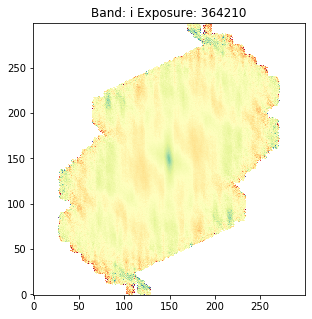

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 50.495 ± 1.161 mas^2
xif: 4.224 ± 0.567 mas^2
Reduction: 11.955


Jackknifed xi+ (Inter-set pairs excluded)
xi0: 95.815 ± 1.74 mas^2
xif: 8.893 ± 0.786 mas^2
Reduction: 10.775


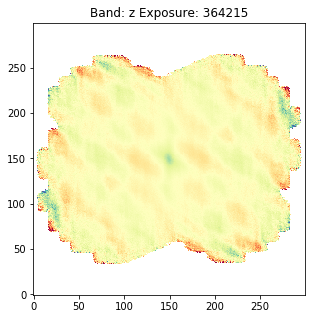

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 41.216 ± 0.99 mas^2
xif: 5.348 ± 0.577 mas^2
Reduction: 7.706


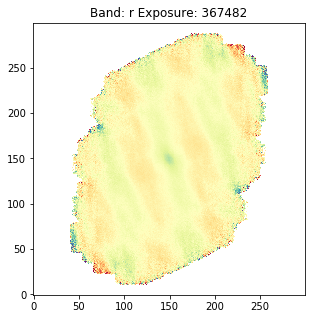

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 33.068 ± 1.526 mas^2
xif: 6.242 ± 1.24 mas^2
Reduction: 5.298


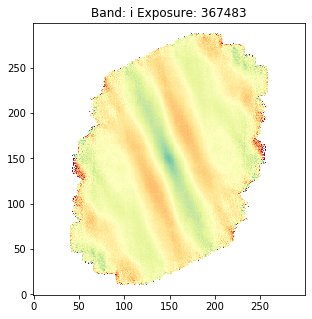

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 56.615 ± 1.223 mas^2
xif: 5.3 ± 0.597 mas^2
Reduction: 10.682


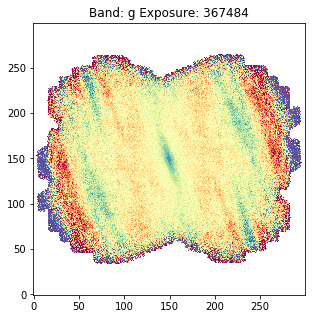

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 59.199 ± 9.071 mas^2
xif: 162.157 ± 10.837 mas^2
Reduction: 0.365


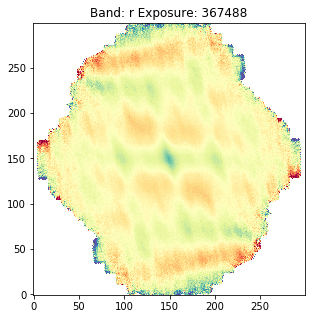

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 63.078 ± 1.698 mas^2
xif: 10.257 ± 1.036 mas^2
Reduction: 6.15


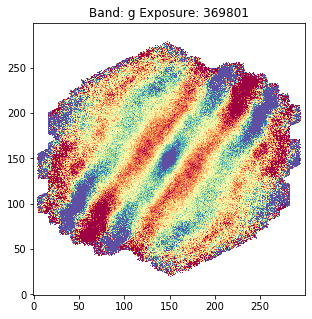

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 225.144 ± 15.2 mas^2
xif: 127.935 ± 14.407 mas^2
Reduction: 1.76


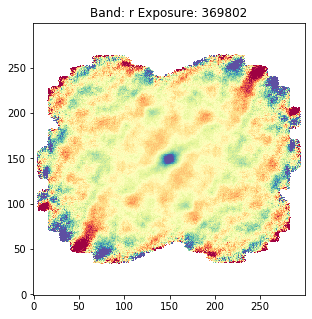

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 178.175 ± 3.823 mas^2
xif: 23.68 ± 1.886 mas^2
Reduction: 7.524


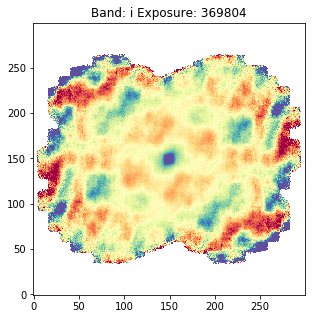

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 175.807 ± 3.043 mas^2
xif: 20.725 ± 1.137 mas^2
Reduction: 8.483


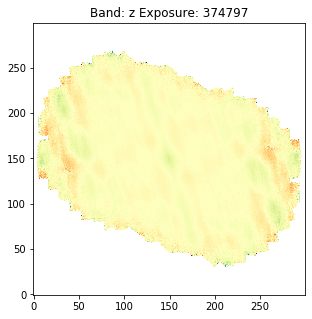

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 21.851 ± 0.635 mas^2
xif: 4.31 ± 0.415 mas^2
Reduction: 5.07


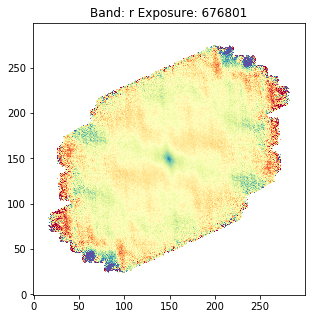

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 74.95 ± 3.095 mas^2
xif: 10.303 ± 2.438 mas^2
Reduction: 7.275


In [142]:
for fileDir in fileDirs:
    try:
        fitsFile = glob.glob(os.path.join(fileDir, "*fits"))[0]
        dataC = GPRutils.loadFITS(fitsFile)
        band = dataC.band
        
        x = dataC.TV[dataC.TV["Maskf"]]["X"]
        y = dataC.TV[dataC.TV["Maskf"]]["Y"]
        dx = dataC.TV[dataC.TV["Maskf"]]["dX"]
        dy = dataC.TV[dataC.TV["Maskf"]]["dY"]
    except Exception:
        continue
        
    xiplus = GPRutils.calcCorrelation2D(x, y, dx, dy, rmax=0.50*u.deg*4, nBins=75*4)[0]

    plt.figure(figsize=(5, 5))
    plt.title(f"Band: {band} Exposure: {dataC.expNum}")
    plt.imshow(
        xiplus,
        origin="Lower",
        cmap="Spectral",
        interpolation="nearest",
        vmin=-100,
        vmax=100
    )
    plt.show()
    print("Jackknifed xi+ (Inter-set pairs excluded)")
    xi0 = dataC.header["xi0"]
    Xerr = dataC.header["xi0_Xerr"]
    Yerr = dataC.header["xi0_Yerr"]
    print(f"xi0: {np.round(xi0, 3)} ± {np.round(np.sqrt(Xerr**2 + Yerr**2), 3)} mas^2")
    xif = dataC.header["xif"]
    Xerr = dataC.header["xif_Xerr"]
    Yerr = dataC.header["xif_Yerr"]
    print(f"xif: {np.round(xif, 3)} ± {np.round(np.sqrt(Xerr**2 + Yerr**2), 3)} mas^2")
    print(f"Reduction: {np.round(xi0/xif, 3)}")

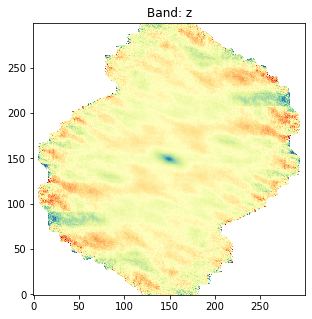

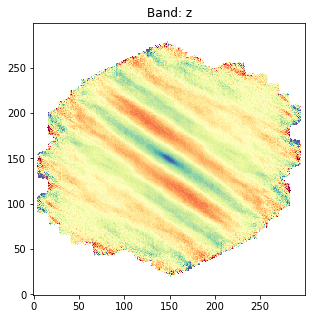

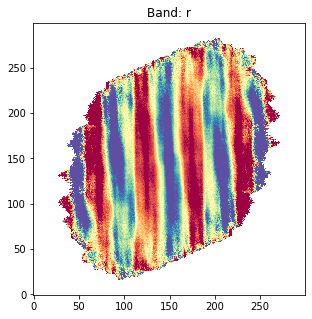

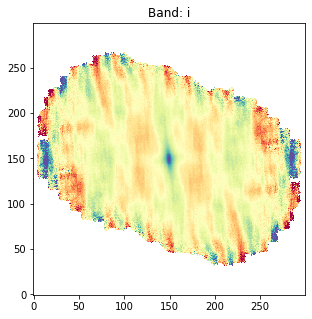

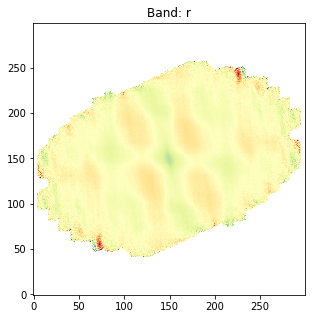

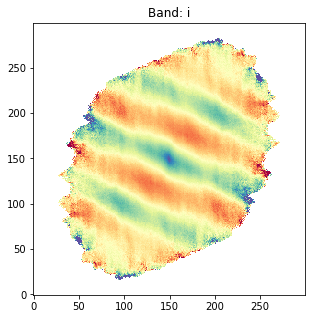

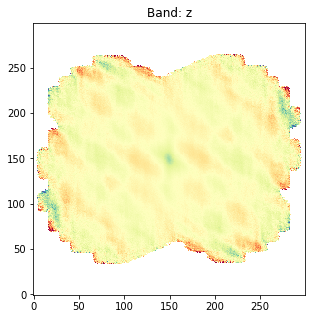

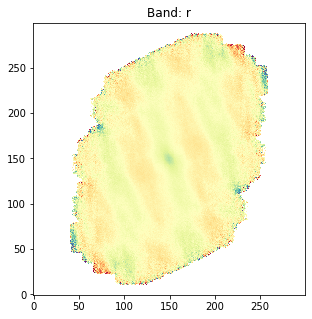

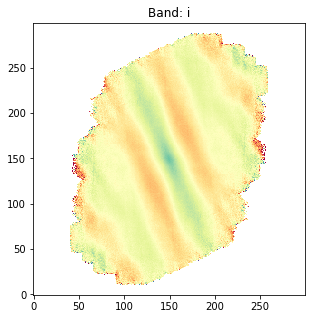

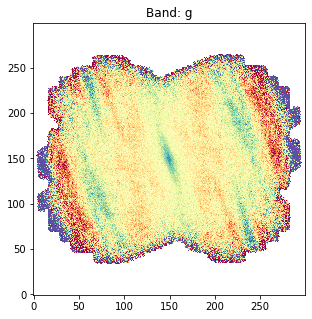

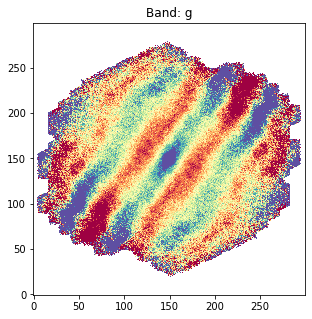

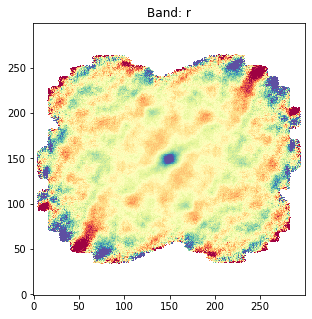

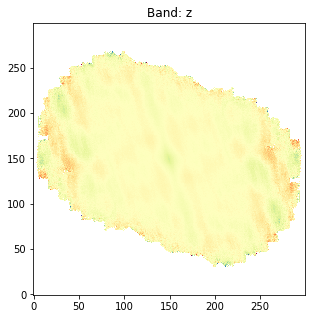

In [140]:
for fileDir in fileDirs:
    try:
        fitsFile = glob.glob(os.path.join(fileDir, "*fits"))[0]
        dataC = GPRutils.loadFITS(fitsFile)
        band = dataC.band
        
        x = dataC.TV[dataC.TV["Maskf"]]["X"]
        y = dataC.TV[dataC.TV["Maskf"]]["Y"]
        dx = dataC.TV[dataC.TV["Maskf"]]["dX"]
        dy = dataC.TV[dataC.TV["Maskf"]]["dY"]
    except Exception:
        continue
        
    xiplus = GPRutils.calcCorrelation2D(x, y, dx, dy, rmax=0.50*u.deg*4, nBins=75*4)[0]

    plt.figure(figsize=(5, 5))
    plt.title(f"Band: {band}")
    plt.imshow(
        xiplus,
        origin="Lower",
        cmap="Spectral",
        interpolation="nearest",
        vmin=-100,
        vmax=100
    )
    plt.show()